In [31]:
import numpy as np
import sys

def Karmarkar_method(x,c,A,b,gamma,eps):
    yield x
    while True:
        vk = b - A * x
        Dv2 = np.diag(1.0 / np.square(vk.A1))
        dvec = np.linalg.pinv(A.T * Dv2 * A) * c
        if np.linalg.norm(dvec) < eps:
            break
        hvec = -A * dvec
        if np.max(hvec) <= 0:
            print("unbounded")
            sys.exit(1)
        alpha = gamma * np.min(vk[hvec > 0] / hvec[hvec > 0])
        x -= alpha * dvec
        yield x


In [32]:
# Ax <= b
c = np.matrix([[-600],
               [-900]]) # 目的関数の係数行列
A = np.matrix([[1,2],
                  [2,1]]) # 制約条件の係数行列
b = np.matrix([[10],
               [8]]) # 制約条件

x = np.matrix([[1.0], [1.0]]) # 初期条件の内点

1.0 1.0
0.4785714285714281 2.310714285714286
0.2170732246980418 3.176463387650979
0.15492958042148158 3.722035209789259
0.24273175213785492 4.0382841239310725
0.4341646542738087 4.194672672863096
0.6831127932719055 4.246672103364047
0.9467184151489203 4.23840074242554
1.191772168374406 4.202345880812797
1.3991915147051894 4.159166618147405
1.563297610370879 4.119484857664561
1.6872525482534355 4.087167289868282
1.7780968352272426 4.062507077182879
1.8434366290001085 4.044370531857496
1.8899037666443512 4.031310309128109
1.9227296724592255 4.022018698485587
1.945829070207763 4.0154539391967585
1.962047550113651 4.0108341569536226
1.9734201381545737 4.007590483330027
1.9813888316754142 4.005315970847413
1.9869700747255579 4.003722233316805
1.9908782090008568 4.00260598497528
1.9936144089027366 4.0018243581816275
1.9955299512556106 4.001277118215292
1.9968709118844825 4.000894009747927
1.9978096167204624 4.000625817622886
1.9984667230646496 4.000438076655858
1.9989267026893371 4.000306655

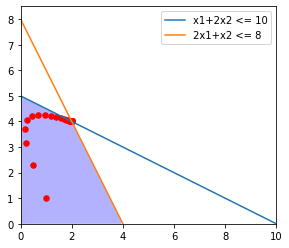

In [33]:
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 100)
y1 = 5 - 0.5 * t
y2 =  8 - 2 * t
y3 = np.zeros_like(t)
y4 = np.minimum(y1, y2)

y5 = 16 / 3 - 2 / 3 * t
plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, y1, label="x1+2x2 <= 10")
plt.plot(t, y2, label="2x1+x2 <= 8")

plt.fill_between(t, y3, y4, where=y4>y3, facecolor='blue', alpha=0.3)
plt.ylim(0, 8.5)
plt.xlim(0, 10)
plt.legend(loc=0)

for x in Karmarkar_method(x, c, A, b, gamma=0.3, eps=1.0e-5):
    print(x[0,0], x[1,0]) 
    plt.scatter([x[0,0]], [x[1,0]],c='red',s=30)
    plt.ylim(0, 8.5)

plt.show()